## What is Supervised Learning?

Supervised Learning is a type of Machine Learning where the algorithm learns from labeled data.
Labeled data means each input (X) has a corresponding output (Y).

The model’s job is to learn the mapping 

$f:X->Y$

After training, the model should generalize and make accurate predictions on new, unseen data.

Analogy: Think of a teacher (the labels) guiding a student (the algorithm). The student practices on problems with answers provided, then takes an exam where answers are hidden.

## Types of Supervised Learning
* **Linear Regression**
* **Logistic Regression**

## Linear Regression
Linear Regression is one of the simplest and most fundamental algorithms in Machine Learning. It is used to model the relationship between independent variables (features) and a dependent variable (target) by fitting a straight line (or hyperplane in higher dimensions).

Goal: Find the best linear equation that predicts the target

$Y=WX + b$

$y = w_1x_1 + w_2x_2 + \dots w_nx_n + b$

Training Objective: Find coefficients $w$ and intercept $b$ that minimize the Mean Squared Error (MSE):

$MSE = \frac{1}{n}\sum^n_{i=1}(y_i - \hat{y}_i)^2$

where $y_i$ = target value and $\hat{y}_i$  predicted value


### Example Housing Price Prediction

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Load dataset
housing = fetch_california_housing()

# Convert to pandas DataFrame
df = pd.DataFrame(housing.data, columns=housing.feature_names)

# Add the target column (house value)
df["MedHouseValue"] = housing.target

# Show first 5 rows
print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseValue  
0    -122.23          4.526  
1    -122.22          3.585  
2    -122.24          3.521  
3    -122.25          3.413  
4    -122.25          3.422  


In [3]:
df.describe(include='all')

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MedInc         20640 non-null  float64
 1   HouseAge       20640 non-null  float64
 2   AveRooms       20640 non-null  float64
 3   AveBedrms      20640 non-null  float64
 4   Population     20640 non-null  float64
 5   AveOccup       20640 non-null  float64
 6   Latitude       20640 non-null  float64
 7   Longitude      20640 non-null  float64
 8   MedHouseValue  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [5]:
df.isnull().sum()

MedInc           0
HouseAge         0
AveRooms         0
AveBedrms        0
Population       0
AveOccup         0
Latitude         0
Longitude        0
MedHouseValue    0
dtype: int64

<Axes: >

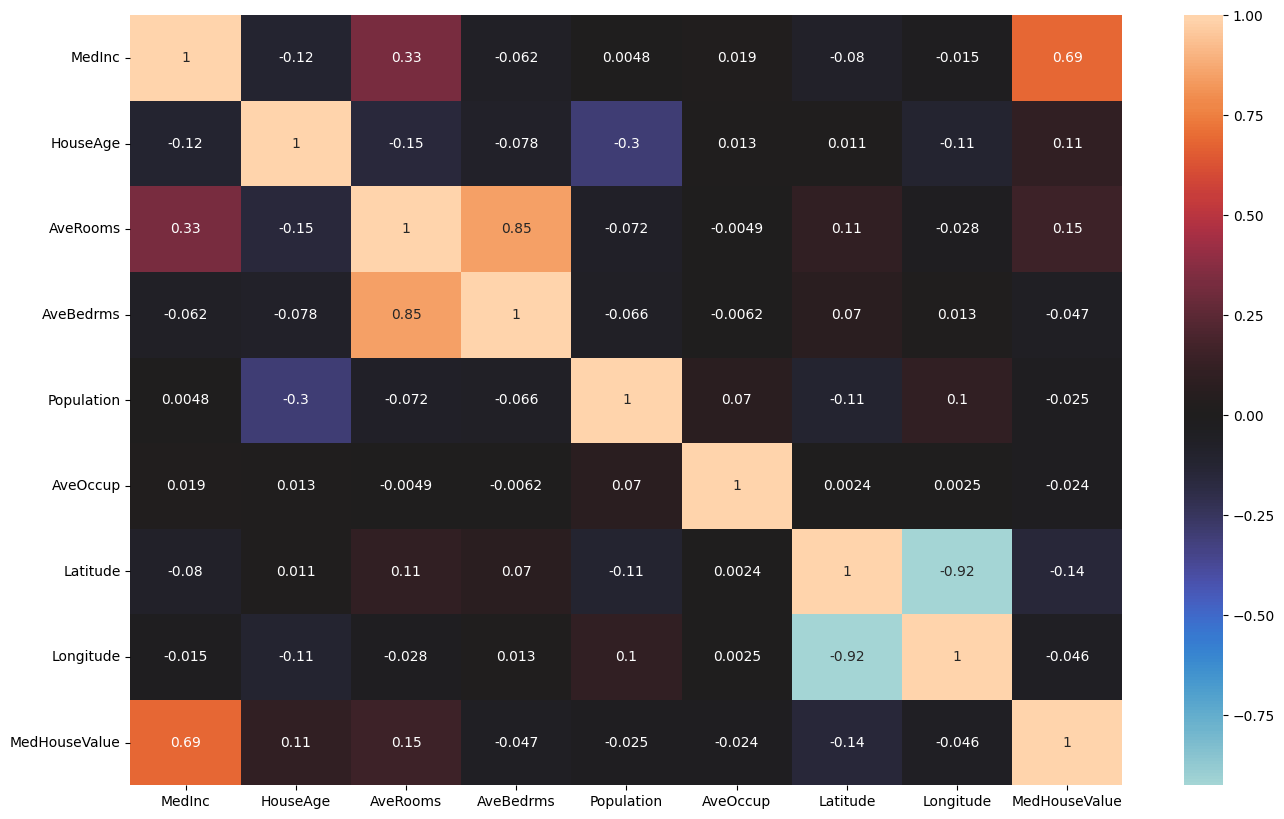

In [6]:
plt.figure(figsize = (16,10))
sns.heatmap(df.corr(),annot=True,center=0 )

In [11]:
# Load dataset into pandas DataFrame
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df["MedHouseValue"] = housing.target

# Select important features (commonly used in housing price prediction)
features = ["MedInc", "HouseAge", "AveRooms", "AveBedrms", "Population", "AveOccup", "Latitude", "Longitude"]
X = df[features]
y = df["MedHouseValue"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Initialize and train Linear Regression model
lin_reg = LinearRegression()
# lin_reg.fit(X_train, y_train)
lin_reg.fit(X_train_scaled, y_train)

# Predictions
y_pred = lin_reg.predict(X_test_scaled)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Coefficients:", lin_reg.coef_)
print("Intercept:", lin_reg.intercept_)
print("Mean Squared Error:", mse)
print("R² Score:", r2)

Coefficients: [ 0.85438303  0.12254624 -0.29441013  0.33925949 -0.00230772 -0.0408291
 -0.89692888 -0.86984178]
Intercept: 2.071946937378881
Mean Squared Error: 0.5558915986952444
R² Score: 0.5757877060324508


Coefficients: [ 4.48674910e-01  9.72425752e-03 -1.23323343e-01  7.83144907e-01
 -2.02962058e-06 -3.52631849e-03 -4.19792487e-01 -4.33708065e-01]
Intercept: -37.02327770606416
Mean Squared Error: 0.5558915986952442
R² Score: 0.575787706032451

### Logistic Regression
Despite its name, Logistic Regression is actually a classification algorithm, not a regression one.
It predicts probabilities of classes using the logistic (sigmoid) function.

* **Goal**: Estimate the probability that a given input belongs to a class.
* **Output**: A probability between 0 and 1.
* **Example Decision Rule**: Assign class 1 if $P(y=1∣x)≥0.5$, else class 0.

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

In [13]:
# Load dataset
digits = load_digits()
X, y = digits.data, digits.target

# Shape of dataset
print("Feature matrix shape:", X.shape)   # (n_samples, n_features)
print("Target vector shape:", y.shape)    # (n_samples,)
print("Unique labels:", np.unique(y))

Feature matrix shape: (1797, 64)
Target vector shape: (1797,)
Unique labels: [0 1 2 3 4 5 6 7 8 9]


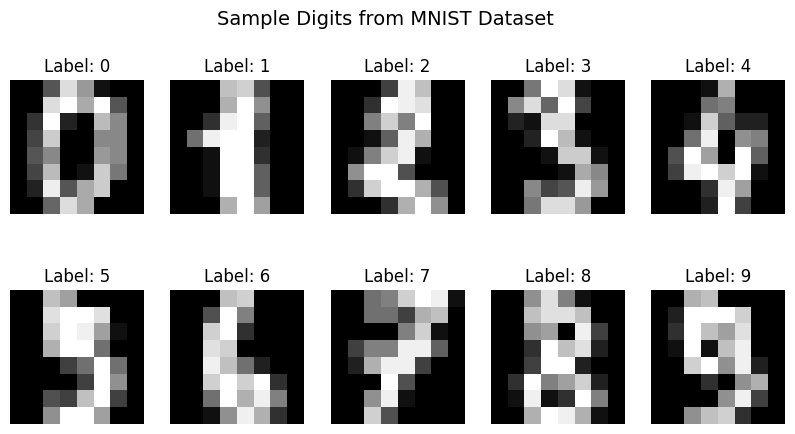

In [14]:
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='gray')
    ax.set_title(f"Label: {y[i]}")
    ax.axis('off')
plt.suptitle("Sample Digits from MNIST Dataset", fontsize=14)
plt.show()

C:\Users\Dagi\AppData\Local\Temp\ipykernel_63120\2986568490.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="label", data=df, palette="viridis")


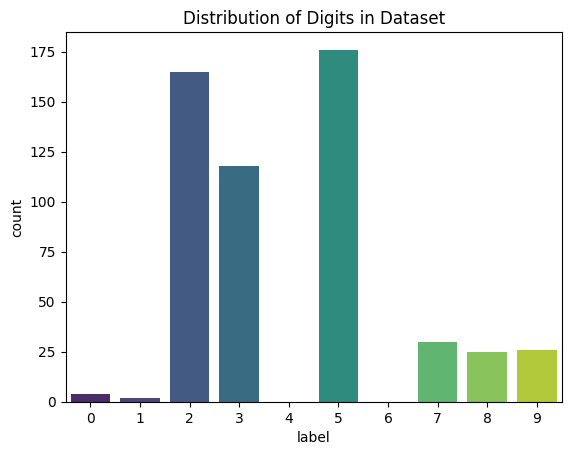

In [15]:
# Convert to DataFrame for easier analysis
df = pd.DataFrame(X)
df["label"] = y

# Count plot of digit frequencies
sns.countplot(x="label", data=df, palette="viridis")
plt.title("Distribution of Digits in Dataset")
plt.show()

In [16]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Logistic Regression model
log_reg = LogisticRegression(max_iter=5000, solver="lbfgs", multi_class="multinomial")
log_reg.fit(X_train, y_train)

# Predictions
y_pred = log_reg.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

C:\Users\Dagi\Documents\STUDY\the-ai-engineer-pathway\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.9583333333333334

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99        36
           1       0.89      0.89      0.89        36
           2       0.97      1.00      0.99        35
           3       0.95      1.00      0.97        37
           4       0.95      1.00      0.97        36
           5       0.97      0.97      0.97        37
           6       1.00      0.97      0.99        36
           7       1.00      0.97      0.99        36
           8       0.86      0.86      0.86        35
           9       1.00      0.94      0.97        36

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360

